## Imports

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

## Scikit-Learn Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)] #only selecting petal length and width features
y = (iris.target==0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5], [1.4, 0.2]])
y_pred

array([0, 1])

## Keras - Fashion MNIST
###  Load data

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


### Build the Neural Network

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Accessing a model's layers

In [6]:
model.layers

#### Layer names

In [7]:
[x.name for x in model.layers]

['flatten', 'dense', 'dense_1', 'dense_2']

#### Fetching a layer by its index

In [8]:
hidden_1 = model.layers[1]
model.get_layer('dense') is hidden_1

True

#### Layer Parameters

In [9]:
weights, biases = hidden_1.get_weights()

In [10]:
weights

array([[-0.04427585, -0.00024244,  0.01866693, ...,  0.01325383,
        -0.01552722,  0.07336542],
       [-0.00310854,  0.07214363, -0.04187796, ...,  0.04819947,
         0.05638187,  0.04144794],
       [ 0.03419191, -0.05826708, -0.03787257, ..., -0.00509564,
         0.0558667 ,  0.04363751],
       ...,
       [-0.03009715,  0.03874832,  0.04411681, ..., -0.01201566,
        -0.01834071, -0.04755982],
       [ 0.05108467,  0.02862097,  0.07026577, ..., -0.0578838 ,
        -0.05448629,  0.03705193],
       [ 0.02376926,  0.01885285, -0.06379855, ..., -0.06918783,
        -0.05393652,  0.00448312]], dtype=float32)

In [11]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Compiling the model

In [12]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

### Training and evaluating the model

In [13]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 123us/sample - loss: 0.7219 - accuracy: 0.7644 - val_loss: 0.5168 - val_accuracy: 0.8244
Epoch 2/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.4840 - accuracy: 0.8309 - val_loss: 0.4469 - val_accuracy: 0.8486
Epoch 3/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4398 - accuracy: 0.8452 - val_loss: 0.4261 - val_accuracy: 0.8546
Epoch 4/30
55000/55000 [==============================] - 6s 104us/sample - loss: 0.4143 - accuracy: 0.8545 - val_loss: 0.3893 - val_accuracy: 0.8678
Epoch 5/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3931 - accuracy: 0.8613 - val_loss: 0.3808 - val_accuracy: 0.8706
Epoch 6/30
55000/55000 [==============================] - 5s 99us/sample - loss: 0.3777 - accuracy: 0.8667 - val_loss: 0.3684 - val_accuracy: 0.8708
Epoch 7/30
55000/55000 [============================

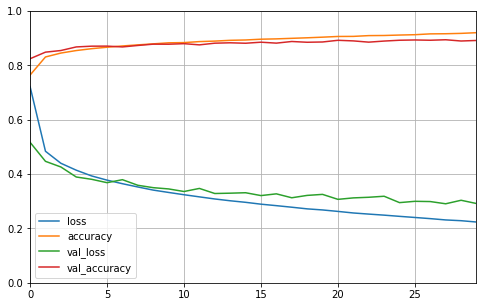

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) #set the vertical range to [0-1]
plt.show()

In [15]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[67.65622663391828, 0.8415]

In [16]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [21]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [22]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Regression MLP Using the Sequential API

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 127us/sample - loss: 1.8287 - val_loss: 0.5876
Epoch 2/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.5250 - val_loss: 0.4982
Epoch 3/20
11610/11610 [==============================] - 1s 98us/sample - loss: 0.4718 - val_loss: 0.4725
Epoch 4/20
11610/11610 [==============================] - 1s 96us/sample - loss: 0.4437 - val_loss: 0.4487
Epoch 5/20
11610/11610 [==============================] - 1s 105us/sample - loss: 0.4358 - val_loss: 0.4472
Epoch 6/20
11610/11610 [==============================] - 1s 103us/sample - loss: 0.4185 - val_loss: 0.4300
Epoch 7/20
11610/11610 [==============================] - 1s 105us/sample - loss: 0.4126 - val_loss: 0.4114
Epoch 8/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.4030 - val_loss: 0.4027
Epoch 9/20
11610/11610 [==============================] - 1s 99us/sample - loss: 0.3964 -

In [35]:
y_pred

array([[1.3812866],
       [2.3568668],
       [4.469237 ]], dtype=float32)

In [36]:
y_new = y_test[:3]
y_new

array([1.412  , 2.168  , 5.00001])

### Building Complex Models Using the Functional API

In [38]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

In [46]:
model = keras.Model(inputs=[input_], outputs=[output])
model.compile(loss="mse", optimizer = keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 145us/sample - loss: 0.4283 - val_loss: 0.4330
Epoch 2/20
11610/11610 [==============================] - 1s 104us/sample - loss: 0.4275 - val_loss: 0.4316
Epoch 3/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.4257 - val_loss: 0.4293
Epoch 4/20
11610/11610 [==============================] - 1s 104us/sample - loss: 0.4244 - val_loss: 0.4280
Epoch 5/20
11610/11610 [==============================] - 1s 107us/sample - loss: 0.4231 - val_loss: 0.4278
Epoch 6/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.4221 - val_loss: 0.4255
Epoch 7/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.4207 - val_loss: 0.4239
Epoch 8/20
11610/11610 [==============================] - 1s 105us/sample - loss: 0.4195 - val_loss: 0.4229
Epoch 9/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.418

In [47]:
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [50]:
y_pred = model.predict(X_new)
y_pred

array([[1.219666 ],
       [2.331191 ],
       [4.1090813]], dtype=float32)

In [49]:
y_new

array([1.412  , 2.168  , 5.00001])

#### Handling Multiple Inputs

In [61]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [62]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_new[:, :5], X_new[:, 2:]

In [64]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_val_A, X_val_B), y_val))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 141us/sample - loss: 2.0869 - val_loss: 0.9188
Epoch 2/20
11610/11610 [==============================] - 1s 120us/sample - loss: 0.7690 - val_loss: 0.7321
Epoch 3/20
11610/11610 [==============================] - 1s 118us/sample - loss: 0.6622 - val_loss: 0.6615
Epoch 4/20
11610/11610 [==============================] - 1s 120us/sample - loss: 0.6128 - val_loss: 0.6205
Epoch 5/20
11610/11610 [==============================] - 1s 113us/sample - loss: 0.5831 - val_loss: 0.5935
Epoch 6/20
11610/11610 [==============================] - 1s 109us/sample - loss: 0.5622 - val_loss: 0.5736
Epoch 7/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.5459 - val_loss: 0.5586
Epoch 8/20
11610/11610 [==============================] - 1s 114us/sample - loss: 0.5360 - val_loss: 0.5458
Epoch 9/20
11610/11610 [==============================] - 1s 109us/sample - loss: 0.526

In [66]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [67]:
y_pred = model.predict((X_new_A, X_new_B))
y_pred

array([[1.0147659],
       [2.3417077],
       [4.054077 ]], dtype=float32)

In [68]:
y_new

array([1.412  , 2.168  , 5.00001])

#### Auxiliary Outputs

In [71]:
aux_output= keras.layers.Dense(1)(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20, 
                    validation_data=((X_val_A, X_val_B), (y_val, y_val)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 224us/sample - loss: 2.2825 - dense_20_loss: 0.4852 - dense_23_loss: 1.7967 - val_loss: 1.8205 - val_dense_20_loss: 0.4954 - val_dense_23_loss: 1.3249
Epoch 2/20
11610/11610 [==============================] - 2s 160us/sample - loss: 1.6635 - dense_20_loss: 0.4847 - dense_23_loss: 1.1785 - val_loss: 1.6289 - val_dense_20_loss: 0.4955 - val_dense_23_loss: 1.1332
Epoch 3/20
11610/11610 [==============================] - 2s 170us/sample - loss: 1.4975 - dense_20_loss: 0.4839 - dense_23_loss: 1.0135 - val_loss: 1.4914 - val_dense_20_loss: 0.4961 - val_dense_23_loss: 0.9952
Epoch 4/20
11610/11610 [==============================] - 2s 169us/sample - loss: 1.3801 - dense_20_loss: 0.4830 - dense_23_loss: 0.8967 - val_loss: 1.3925 - val_dense_20_loss: 0.4968 - val_dense_23_loss: 0.8955
Epoch 5/20
11610/11610 [==============================] - 2s 179us/sample - loss: 1.2946 - dense_20_los

In [72]:
mse_test = model.evaluate((X_test_A, X_test_B), (y_test, y_test))

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [73]:
y_pred_A, y_pred_B = model.predict((X_new_A, X_new_B))

In [74]:
y_pred_A

array([[1.249135 ],
       [2.3294194],
       [4.3314443]], dtype=float32)

In [75]:
y_pred_B

array([[0.7901279],
       [2.335245 ],
       [4.2829537]], dtype=float32)

In [76]:
y_new

array([1.412  , 2.168  , 5.00001])

### Using the Subclassing API to Build Dynamic Models

In [97]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [100]:
model = WideAndDeepModel()
model.compile(loss="mse", optimizer = keras.optimizers.SGD(lr=1e-3))
#model.call(inputs=(X_train_A, X_train_B))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20, validation_data=((X_val_A, X_val_B), (y_val, y_val)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 238us/sample - loss: 4.8303 - output_1_loss: 2.3923 - output_2_loss: 2.4362 - val_loss: 2.1652 - val_output_1_loss: 0.8359 - val_output_2_loss: 1.3293
Epoch 2/20
11610/11610 [==============================] - 2s 169us/sample - loss: 1.9159 - output_1_loss: 0.7233 - output_2_loss: 1.1923 - val_loss: 1.7942 - val_output_1_loss: 0.6832 - val_output_2_loss: 1.1107
Epoch 3/20
11610/11610 [==============================] - 2s 158us/sample - loss: 1.6349 - output_1_loss: 0.6297 - output_2_loss: 1.0052 - val_loss: 1.6457 - val_output_1_loss: 0.6481 - val_output_2_loss: 0.9974
Epoch 4/20
11610/11610 [==============================] - 2s 156us/sample - loss: 1.5085 - output_1_loss: 0.6029 - output_2_loss: 0.9055 - val_loss: 1.5401 - val_output_1_loss: 0.6267 - val_output_2_loss: 0.9133
Epoch 5/20
11610/11610 [==============================] - 2s 169us/sample - loss: 1.4209 - output_1_los

In [101]:
mse_test = model.evaluate((X_test_A, X_test_B), (y_test, y_test))

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [102]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

In [103]:
y_pred_main

array([[1.2138532],
       [2.312051 ],
       [4.0039535]], dtype=float32)

In [104]:
y_pred_aux

array([[0.8707451],
       [2.3698316],
       [3.8573241]], dtype=float32)

In [105]:
y_new

array([1.412  , 2.168  , 5.00001])

In [106]:
model.summary()

Model: "wide_and_deep_model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             multiple                  210       
_________________________________________________________________
dense_77 (Dense)             multiple                  930       
_________________________________________________________________
dense_78 (Dense)             multiple                  36        
_________________________________________________________________
dense_79 (Dense)             multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


### Saving and Restoring a Model

In [129]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
model.compile(loss="mse", optimizer = keras.optimizers.SGD(lr=1e-2))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 145us/sample - loss: 2.9388 - val_loss: 0.7000
Epoch 2/20
11610/11610 [==============================] - 1s 120us/sample - loss: 4.4446 - val_loss: 0.5640
Epoch 3/20
11610/11610 [==============================] - 1s 113us/sample - loss: 8.6586 - val_loss: 0.5762
Epoch 4/20
11610/11610 [==============================] - 1s 116us/sample - loss: 0.5411 - val_loss: 0.5437
Epoch 5/20
11610/11610 [==============================] - 1s 113us/sample - loss: 0.5325 - val_loss: 0.5355
Epoch 6/20
11610/11610 [==============================] - 1s 123us/sample - loss: 0.5482 - val_loss: 0.5248
Epoch 7/20
11610/11610 [==============================] - 1s 123us/sample - loss: 0.5160 - val_loss: 0.5206
Epoch 8/20
11610/11610 [==============================] - 1s 121us/sample - loss: 0.5137 - val_loss: 0.5339
Epoch 9/20
11610/11610 [==============================] - 1s 119us/sample - loss: 0.511

In [108]:
model.save('keras_functional_regression_model.h5')

In [109]:
loaded_model = keras.models.load_model('keras_functional_regression_model.h5')

In [112]:
mse_test = loaded_model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [113]:
y_pred = loaded_model.predict(X_new)
y_pred

array([[1.1989088],
       [2.2872844],
       [4.2126036]], dtype=float32)

### Saving and Restoring a Model

In [115]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_functional_regression_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 1s 108us/sample - loss: 0.4441 - val_loss: 0.4589
Epoch 2/200
11610/11610 [==============================] - 1s 120us/sample - loss: 0.4427 - val_loss: 0.4559
Epoch 3/200
11610/11610 [==============================] - 1s 116us/sample - loss: 0.4415 - val_loss: 0.4543
Epoch 4/200
11610/11610 [==============================] - 1s 116us/sample - loss: 0.4391 - val_loss: 0.4531
Epoch 5/200
11610/11610 [==============================] - 1s 118us/sample - loss: 0.4383 - val_loss: 0.4516
Epoch 6/200
11610/11610 [==============================] - 1s 122us/sample - loss: 0.4364 - val_loss: 0.4507
Epoch 7/200
11610/11610 [==============================] - 1s 109us/sample - loss: 0.4353 - val_loss: 0.4491
Epoch 8/200
11610/11610 [==============================] - 1s 115us/sample - loss: 0.4337 - val_loss: 0.4470
Epoch 9/200
11610/11610 [==============================] - 1s 108us/sample - lo

11610/11610 [==============================] - 1s 112us/sample - loss: 0.3688 - val_loss: 0.3727
Epoch 76/200
11610/11610 [==============================] - 1s 109us/sample - loss: 0.3684 - val_loss: 0.3717
Epoch 77/200
11610/11610 [==============================] - 1s 104us/sample - loss: 0.3683 - val_loss: 0.3725
Epoch 78/200
11610/11610 [==============================] - 1s 108us/sample - loss: 0.3670 - val_loss: 0.3704
Epoch 79/200
11610/11610 [==============================] - 1s 103us/sample - loss: 0.3677 - val_loss: 0.3692
Epoch 80/200
11610/11610 [==============================] - 1s 106us/sample - loss: 0.3659 - val_loss: 0.3691
Epoch 81/200
11610/11610 [==============================] - 1s 105us/sample - loss: 0.3656 - val_loss: 0.3681
Epoch 82/200
11610/11610 [==============================] - 1s 110us/sample - loss: 0.3651 - val_loss: 0.3676
Epoch 83/200
11610/11610 [==============================] - 1s 107us/sample - loss: 0.3637 - val_loss: 0.3663
Epoch 84/200
11610/1161

11610/11610 [==============================] - 1s 109us/sample - loss: 0.3335 - val_loss: 0.3328
Epoch 150/200
11610/11610 [==============================] - 1s 114us/sample - loss: 0.3333 - val_loss: 0.3327
Epoch 151/200
11610/11610 [==============================] - 1s 111us/sample - loss: 0.3326 - val_loss: 0.3319
Epoch 152/200
11610/11610 [==============================] - 1s 107us/sample - loss: 0.3321 - val_loss: 0.3327
Epoch 153/200
11610/11610 [==============================] - 1s 109us/sample - loss: 0.3336 - val_loss: 0.3319
Epoch 154/200
11610/11610 [==============================] - 1s 103us/sample - loss: 0.3313 - val_loss: 0.3319
Epoch 155/200
11610/11610 [==============================] - 1s 107us/sample - loss: 0.3318 - val_loss: 0.3325
Epoch 156/200
11610/11610 [==============================] - 1s 105us/sample - loss: 0.3308 - val_loss: 0.3310
Epoch 157/200
11610/11610 [==============================] - 1s 118us/sample - loss: 0.3305 - val_loss: 0.3317
Epoch 158/200
1

### Using TensorBoard for Visualization

In [123]:
import os
import time
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():    
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [134]:
#tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
#%reload_ext tensorboard
#%tensorboard --logdir=./my_logs --port=6006
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 1s 127us/sample - loss: 0.3947 - val_loss: 0.3917
Epoch 2/200
11610/11610 [==============================] - 1s 124us/sample - loss: 0.3917 - val_loss: 0.3867
Epoch 3/200
11610/11610 [==============================] - 1s 116us/sample - loss: 0.3892 - val_loss: 0.3897
Epoch 4/200
11610/11610 [==============================] - 1s 116us/sample - loss: 0.3888 - val_loss: 0.3834
Epoch 5/200
11610/11610 [==============================] - 1s 117us/sample - loss: 0.3806 - val_loss: 0.3817
Epoch 6/200
11610/11610 [==============================] - 1s 119us/sample - loss: 0.3852 - val_loss: 0.3827
Epoch 7/200
11610/11610 [==============================] - 1s 119us/sample - loss: 0.3736 - val_loss: 0.3838
Epoch 8/200
11610/11610 [==============================] - 1s 122us/sample - loss: 0.3787 - val_loss: 0.3747
Epoch 9/200
11610/11610 [==============================] - 1s 118us/sample - lo

11610/11610 [==============================] - 1s 112us/sample - loss: 0.3292 - val_loss: 0.3177
Epoch 76/200
11610/11610 [==============================] - 1s 111us/sample - loss: 0.3254 - val_loss: 0.3190
Epoch 77/200
11610/11610 [==============================] - 1s 114us/sample - loss: 0.3198 - val_loss: 0.3133
Epoch 78/200
11610/11610 [==============================] - 1s 112us/sample - loss: 0.3273 - val_loss: 0.3142
Epoch 79/200
11610/11610 [==============================] - 1s 114us/sample - loss: 0.3223 - val_loss: 0.3123
Epoch 80/200
11610/11610 [==============================] - 1s 116us/sample - loss: 0.3229 - val_loss: 0.3220
Epoch 81/200
11610/11610 [==============================] - 1s 113us/sample - loss: 0.3308 - val_loss: 0.3513
Epoch 82/200
11610/11610 [==============================] - 1s 114us/sample - loss: 0.3352 - val_loss: 0.3168
Epoch 83/200
11610/11610 [==============================] - 1s 119us/sample - loss: 0.3199 - val_loss: 0.3148
Epoch 84/200
11610/1161

11610/11610 [==============================] - 1s 113us/sample - loss: 0.3055 - val_loss: 0.3078
Epoch 150/200
11610/11610 [==============================] - 1s 115us/sample - loss: 0.3078 - val_loss: 0.2992
Epoch 151/200
11610/11610 [==============================] - 2s 136us/sample - loss: 0.3038 - val_loss: 0.2996
Epoch 152/200
11610/11610 [==============================] - 1s 119us/sample - loss: 0.3029 - val_loss: 0.2966
Epoch 153/200
11610/11610 [==============================] - 1s 122us/sample - loss: 0.2997 - val_loss: 0.3059
Epoch 154/200
11610/11610 [==============================] - 1s 112us/sample - loss: 0.2979 - val_loss: 0.3140
Epoch 155/200
11610/11610 [==============================] - 1s 120us/sample - loss: 0.3002 - val_loss: 0.3022
Epoch 156/200
11610/11610 [==============================] - 1s 117us/sample - loss: 0.2997 - val_loss: 0.3045
Epoch 157/200
11610/11610 [==============================] - 1s 119us/sample - loss: 0.2996 - val_loss: 0.2929
Epoch 158/200
1

In [121]:
time.strftime("run_%Y_%m_%d-%H_%M_%S")

'run_2020_08_02-23_33_56'

In [7]:
x = tf.constant([[2., 3.], [4., 5.]])

In [8]:
x.shape

TensorShape([2, 2])

In [9]:
x.dtype

tf.float32

In [11]:
x[:, 1:]

<tf.Tensor: id=8, shape=(2, 1), dtype=float32, numpy=
array([[3.],
       [5.]], dtype=float32)>

In [14]:
x[tf.newaxis, ..., 1]

<tf.Tensor: id=20, shape=(1, 2), dtype=float32, numpy=array([[3., 5.]], dtype=float32)>